In [15]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from config import user
from config import password2
from urllib import parse
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Creating a connection string for the Glassdoor database
protocol="postgresql"
username=user
password=parse.quote(password2)
host="localhost"
port=5432
database_name="Glassdoor_Reviews"

Con_Str=f"{protocol}://{username}:{password}@{host}:{port}/{database_name}"
        
# Create an engine instance
Con = create_engine(Con_Str)

# Connect to PostgreSQL server
dbConnection = Con.connect();

# Read data from PostgreSQL database table and load into a DataFrame instance
data_csv = pd.read_sql("select * from glassdoor", dbConnection);

# Print the DataFrame
print(data_csv);

# Close the database connection
dbConnection.close();

                         firm date_review  \
0       AFH-Wealth-Management  2020-10-01   
1       AFH-Wealth-Management  2021-02-05   
2       AFH-Wealth-Management  2021-02-07   
3       AFH-Wealth-Management  2021-02-07   
4       AFH-Wealth-Management  2021-05-12   
...                       ...         ...   
104505         the-LEGO-Group  2021-05-21   
104506         the-LEGO-Group  2021-05-25   
104507         the-LEGO-Group  2021-05-31   
104508         the-LEGO-Group  2021-06-02   
104509         the-LEGO-Group  2021-06-04   

                                  job_title  \
0                      Office Administrator   
1                           Quality Control   
2                         IFA Administrator   
3                     Investment Operations   
4               Client Engagement Executive   
...                                     ...   
104505   Sales Associate (Brick Specialist)   
104506               Senior Product Manager   
104507           Senior Experience D

In [3]:
data_csv

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2020-10-01,Office Administrator,"Former Employee, more than 3 years","Bromsgrove, England, England",2,1.0,3.0,1.0,1.0,2.0,2.0,x,o,x,The people both make and destroy this place,"Great people in some places, excellent Christm...","Poor pay, huge gap for pay between senior mana..."
1,AFH-Wealth-Management,2021-02-05,Quality Control,Former Employee,"Birmingham, England, England",1,3.0,1.0,2.0,1.0,1.0,1.0,x,o,o,Very low salaries,"Majority of the people there are lovely, and t...",Salaries are much lower than market competitor...
2,AFH-Wealth-Management,2021-02-07,IFA Administrator,"Former Employee, less than 1 year","Bromsgrove, England, England",4,3.0,3.0,4.0,4.0,4.0,2.0,v,o,v,Good,"Nice environment, love people, not too stressful",Management can be clicky at times
3,AFH-Wealth-Management,2021-02-07,Investment Operations,"Former Employee, more than 1 year","Birmingham, England, England",3,5.0,5.0,4.0,3.0,1.0,2.0,x,o,v,AFH Review,-Great People\n-Heading in a good direction ge...,-Low Salary\n-Middle Management likes to micro...
4,AFH-Wealth-Management,2021-05-12,Client Engagement Executive,"Former Employee, less than 1 year","Birmingham, England, England",1,1.0,2.0,1.0,1.0,1.0,1.0,x,x,x,Terrible- avoid like the plague,"None, they lie about working hours, bonuses, p...",-Unachievable bonus unfairly set by manager\n-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104505,the-LEGO-Group,2021-05-21,Sales Associate (Brick Specialist),"Former Employee, less than 1 year","Bloomington, MN",4,5.0,4.0,5.0,4.0,2.0,5.0,v,v,v,Working at LEGO was pretty cool,It's fun to walk around the LEGO store,Doesn't pay a living wage
104506,the-LEGO-Group,2021-05-25,Senior Product Manager,Current Employee,"London, England, England",4,3.0,4.0,2.0,3.0,2.0,3.0,v,r,v,A great brand,Family owned and a great brand. Danish culture...,"A lot of bureaucracy, hard to make things happ..."
104507,the-LEGO-Group,2021-05-31,Senior Experience Designer,"Current Employee, less than 1 year",Billund,5,5.0,5.0,5.0,5.0,5.0,5.0,v,v,v,Awesome place to work,It's a company with a clear purpose and one th...,"Being a global brand, compliance is important...."
104508,the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,v,v,v,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations


In [4]:
# Checking for the data types
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104510 entries, 0 to 104509
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 104510 non-null  object 
 1   date_review          104510 non-null  object 
 2   job_title            104510 non-null  object 
 3   current              104510 non-null  object 
 4   location             104510 non-null  object 
 5   overall_rating       104510 non-null  int64  
 6   work_life_balance    104510 non-null  float64
 7   culture_values       104510 non-null  float64
 8   diversity_inclusion  104510 non-null  float64
 9   career_opp           104510 non-null  float64
 10  comp_benefits        104510 non-null  float64
 11  senior_mgmt          104510 non-null  float64
 12  recommend            104510 non-null  object 
 13  ceo_approv           104510 non-null  object 
 14  outlook              104510 non-null  object 
 15  headline         

In [5]:
# Checking for  number of  unique values across all columns
data_csv.nunique()

firm                      421
date_review               271
job_title               18440
current                    20
location                 6229
overall_rating              5
work_life_balance           5
culture_values              5
diversity_inclusion         5
career_opp                  5
comp_benefits               5
senior_mgmt                 5
recommend                   3
ceo_approv                  4
outlook                     4
headline                55856
pros                   102073
cons                   101645
dtype: int64

## taking only numeric variable

In [6]:
#Create data
X= data_csv[['work_life_balance','culture_values','diversity_inclusion','career_opp','comp_benefits','senior_mgmt']]
y= data_csv['overall_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
#One-hot encoding the entire dataframe
#X_dummies = X_dummies.drop('Unnamed: 0', axis=1)
#X_dummies = pd.get_dummies(X)

# DecisionTree
A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions.

In [8]:
#Decision Tree
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1094,  264,  125,   22,   19],
       [ 425,  606,  655,   90,   35],
       [ 217,  584, 2751, 1500,  204],
       [  55,  140, 1419, 5238, 1666],
       [  36,   55,  311, 1813, 6804]], dtype=int64)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.72      0.65      1524
           2       0.37      0.33      0.35      1811
           3       0.52      0.52      0.52      5256
           4       0.60      0.61      0.61      8518
           5       0.78      0.75      0.77      9019

    accuracy                           0.63     26128
   macro avg       0.57      0.59      0.58     26128
weighted avg       0.63      0.63      0.63     26128



In [10]:
#Traning ,testing score
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.7084662294914649
Testing Score: 0.6312385180649112


In [11]:
#clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
#print(f'Training Score: {clf.score(X_train, y_train)}')
#print(f'Testing Score: {clf.score(X_test, y_test)}')

# Bagging
Instead of having one decision tree, we make 50 random trees and average their output. Decision trees try to make the best decision possible at every point. So if we use the same input, we'll get the same decision tree each time. (And, we won't get a different answer after aggregating.) To get different trees, we give them different inputs by randomly sampling the input dataset. Random sampling with replacement is known as bootstrapping. (We use replacement because a data point might occur multiple times in the random sample.) This method of creating a random ensemble is known as bootstrap aggregating, or bagging.

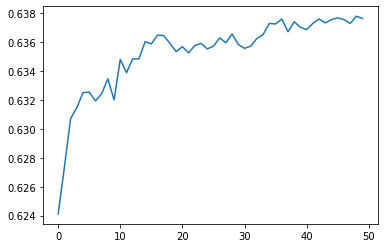

score: 0.637630128597673


In [12]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

# This algorithm is known as "Extremely Random Trees"
or ExtraTrees in scikit-learn

In [13]:
#Extreme Decision Tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.7084662294914649
Testing Score: 0.6336114513165952


# Random Forest 

In [16]:
#Applying Rendom forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.7084662294914649
Testing Score: 0.6370560318432333


# K-nearest neighbors

In [17]:
#Applying K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.626


# 2nd lteration

In [18]:
#Create data
X = data_csv[['work_life_balance','culture_values','diversity_inclusion','career_opp','comp_benefits','senior_mgmt','recommend','ceo_approv','outlook','firm']]
y = data_csv['overall_rating']

In [19]:
#One-hot encoding the entire dataframe
#X_dummies = X_dummies.drop('Unnamed: 0', axis=1)
X_dummies = pd.get_dummies(X)
X=X_dummies 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
#Decision Tree
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9444260161771836
Testing Score: 0.5938839559093693


In [21]:
#Extreme Decision Tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9444260161771836
Testing Score: 0.6309706062461727


In [22]:
#Applying Rendom forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9444260161771836
Testing Score: 0.6469304960195958


In [23]:
#Applying K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.642


In [24]:
print(f'Training Score: {knn.score(X_train, y_train)}')
print(f'Testing Score: {knn.score(X_test, y_test)}')

Training Score: 0.7045239978566508
Testing Score: 0.6424142682180036


# Random Forest Built-in Feature Importance
It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within.

In [25]:
feature_importances = clf.feature_importances_

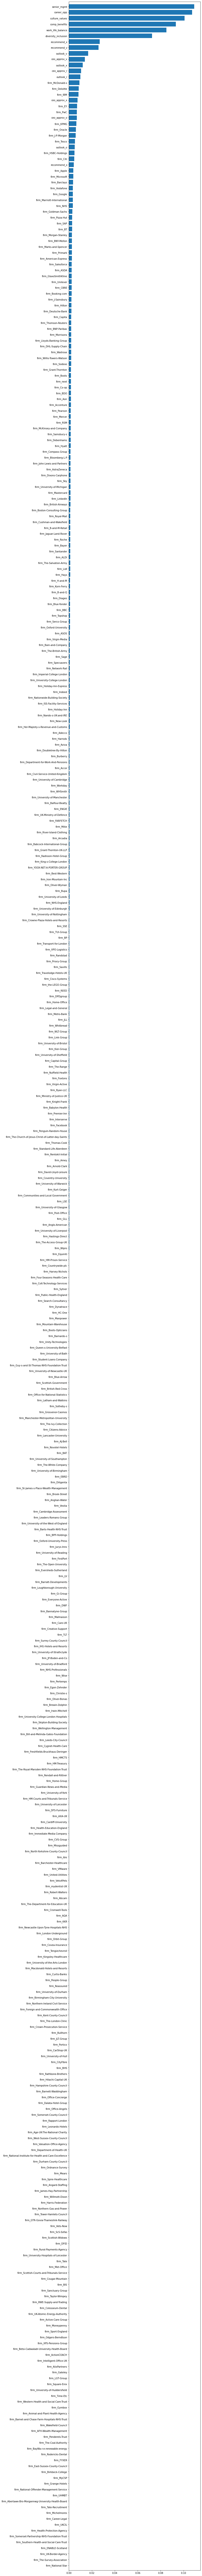

In [26]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

k: 1, Train/Test Score: 0.931/0.570
k: 3, Train/Test Score: 0.763/0.598
k: 5, Train/Test Score: 0.728/0.624
k: 7, Train/Test Score: 0.713/0.636
k: 9, Train/Test Score: 0.705/0.642
k: 11, Train/Test Score: 0.698/0.647
k: 13, Train/Test Score: 0.692/0.648
k: 15, Train/Test Score: 0.690/0.650
k: 17, Train/Test Score: 0.687/0.654
k: 19, Train/Test Score: 0.685/0.656


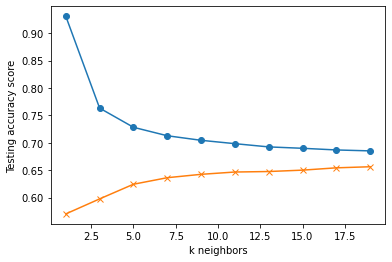

In [27]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()